In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
df = pd.read_csv('/Users/pawankumarkc/Documents/vscodepython/NLP/train_data/tmdb_movies5000.csv')

In [19]:
df.shape
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...


In [ ]:
X = df.iloc[0]
X

In [ ]:
X['keywords']
X['genres']

In [ ]:
generes = json.loads(X['genres'])
generes

In [ ]:
' '.join(''.join(j['name'].split())for j in generes)

In [4]:
def genres_keywords_to_string(row):
    generes = json.loads(row['genres'])
    generes = ' '.join(''.join( g['name'].split()) for g in generes)

    kw = json.loads(row['keywords'])
    kw = ' '.join(''.join(k['name'].split()) for k in kw)

    return "%s %s" % (generes, kw)

In [7]:
df['string'] = df.apply(genres_keywords_to_string, axis=1)

In [8]:
tfidf = TfidfVectorizer(max_features=2000)

In [9]:
X = tfidf.fit_transform(df['string'])
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [13]:
#Creating a mapping between title and index(in df)
movies2index = pd.Series(df.index, index=df['title'])
movies2index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [17]:
idx = movies2index['Spectre']
idx

2

In [18]:
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [20]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#Compute similarity between query and every vector in X
scores = cosine_similarity(query, X)
scores

array([[0.03694098, 0.03875415, 1.        , ..., 0.        , 0.        ,
        0.        ]])

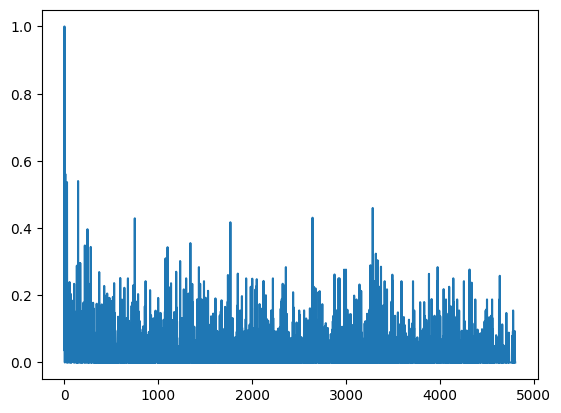

In [23]:
scores = scores.flatten()
plt.plot(scores)

In [24]:
(-scores).argsort()

array([   2,   11,  147, ..., 2438, 2443, 4802])

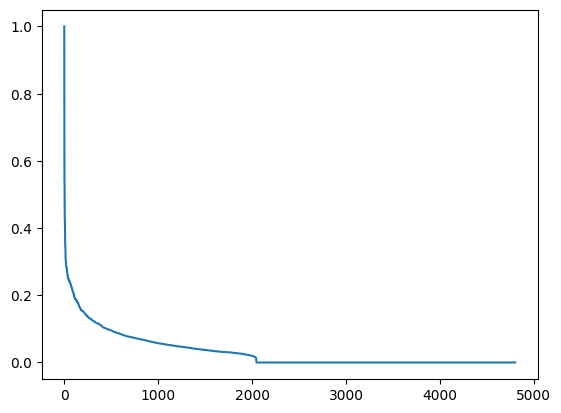

In [27]:
plt.plot(scores[(-scores).argsort()])

In [31]:
#Get top 5 matches
recommended_idx = (-scores).argsort()[1:6]
recommended_idx

array([  11,  147,   29, 3285, 2644])

In [32]:
df['title'].iloc[recommended_idx]

11      Quantum of Solace
147       Die Another Day
29                Skyfall
3285             Restless
2644            Ong Bak 2
Name: title, dtype: object

In [47]:
def Recommender(movie):
    #Understand how X and movies2index is derived
    print('Recommendations for movie: '+movie)
    idx = movies2index[movie]
    query = X[idx]
    scores = cosine_similarity(query, X)
    scores = scores.flatten()
    recommended_idx = (-scores).argsort()[1:6]
    print(df['title'].iloc[recommended_idx])

In [48]:
Recommender('Avatar')

Recommendations for movie: Avatar
47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object
